# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Laptop Prices Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)
<img src="DS1_logo.jpg" alt="DS1 Logo" width="150"/>

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanƒ±z l√ºtfen bizi takip etmeyi unutmayƒ±n </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

<div class="alert alert-info alert-warning ">

# <span style=" color:red"> Laptop Prices Project 
</span>

<div class="alert alert-info alert-warning ">

# <span style=" color:red"> ‚ÄúLaptop fiyatlarƒ± √ºzerine ger√ßekle≈ütireceƒüimiz bu ke≈üifsel veri analizi (EDA- exploratory data analysis) projesine ho≈ü geldiniz. Bu √ßalƒ±≈ümada kullanƒ±lan veri seti; marka, tip, ekran boyutu, donanƒ±m √∂zellikleri ve fiyat gibi √ße≈üitli √∂zellikleri i√ßermektedir. Analiz kapsamƒ±nda veri temizleme, g√∂rselle≈ütirme ve temel istatistiksel y√∂ntemlerle, laptop fiyatlarƒ±nƒ± ≈üekillendiren en √∂nemli deƒüi≈ükenler hakkƒ±nda deƒüerli i√ßg√∂r√ºler elde edilmesi ama√ßlanmaktadƒ±r.‚Äù
</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df0 = pd.read_csv('laptop_data.csv') 
df = df0.copy()

In [5]:
df.head()

Unnamed: 0 Company   TypeName  Inches                    ScreenResolution  \
0           0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1           1   Apple  Ultrabook    13.3                            1440x900   
2           2      HP   Notebook    15.6                   Full HD 1920x1080   
3           3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4           4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
df.describe().T

count          mean           std      min       25%       50%  \
Unnamed: 0  1303.0    651.000000    376.288010     0.00    325.50    651.00   
Inches      1303.0     15.017191      1.426304    10.10     14.00     15.60   
Price       1303.0  59870.042910  37243.201786  9270.72  31914.72  52054.56   

                   75%        max  
Unnamed: 0    976.5000    1302.00  
Inches         15.6000      18.40  
Price       79274.2464  324954.72

In [8]:
df.drop(columns=['Unnamed: 0'], inplace=True)  # tekrar eden index s√ºtunu kaldƒ±rdƒ±k

In [9]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [10]:
df.columns = df.columns.str.capitalize()

In [11]:
df.rename(columns={
    'Typename': 'Type',
    'Screenresolution': 'Resolution',
    'Ram': 'RamGB',
    'Weight': 'Kg',
    'Price' : 'PriceTL',
}, inplace=True)

In [12]:
df.columns

Index(['Company', 'Type', 'Inches', 'Resolution', 'Cpu', 'RamGB', 'Memory',
       'Gpu', 'Opsys', 'Kg', 'PriceTL'],
      dtype='object')

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Data Cleaning: 

In [13]:
df.duplicated().sum()

29

In [14]:
df = df.drop_duplicates(ignore_index = True)  

In [15]:
df.isnull().sum()

Company       0
Type          0
Inches        0
Resolution    0
Cpu           0
RamGB         0
Memory        0
Gpu           0
Opsys         0
Kg            0
PriceTL       0
dtype: int64

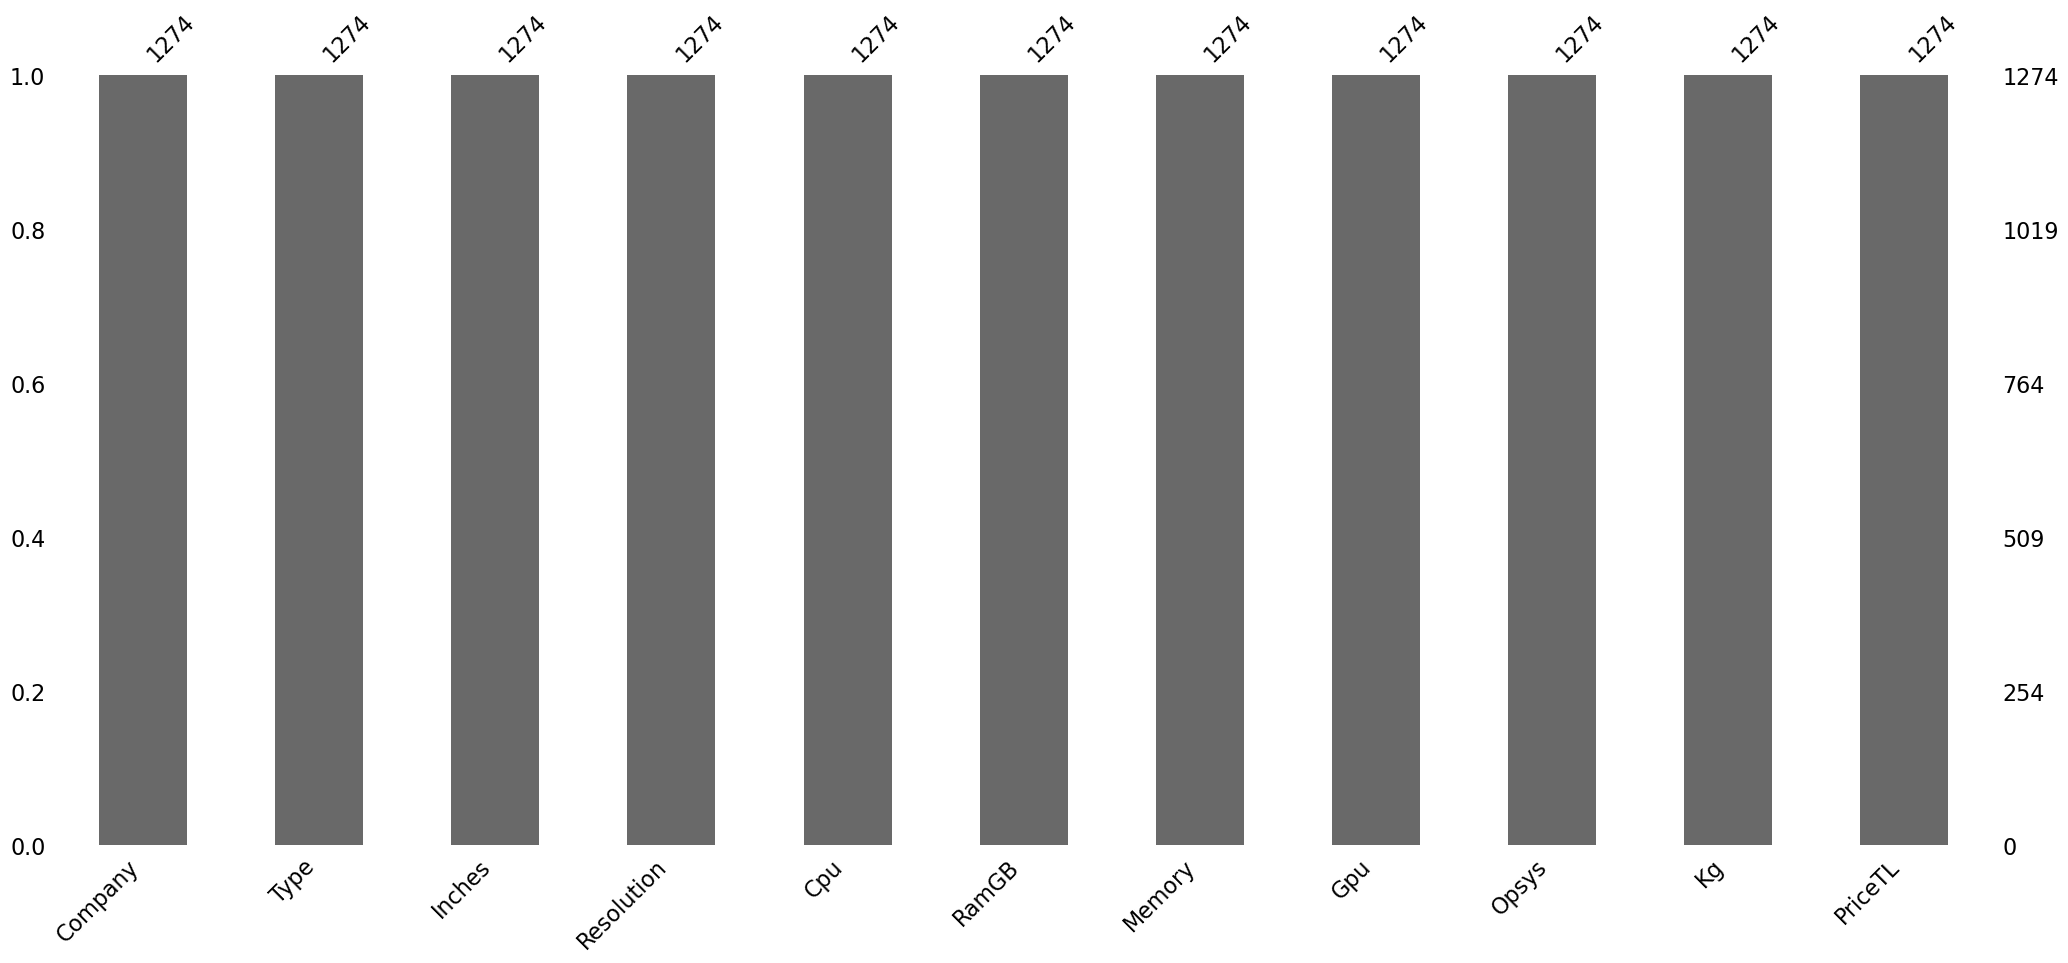

In [16]:
import missingno as msno
msno.bar(df);

<div class="alert alert-block alert-success">

### <span style=" color:red"> Standardize data formats:

- Her s√ºtunun veri t√ºrlerini uygun bi√ßimlere d√∂n√º≈üt√ºr√ºp, sayƒ±sal deƒüerlerin yanƒ±ndaki ifadeleri temizliyoruz.

In [17]:
df.head(10)

Company       Type  Inches                          Resolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
5    Acer   Notebook    15.6                            1366x768   
6   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
7   Apple  Ultrabook    13.3                            1440x900   
8    Asus  Ultrabook    14.0                   Full HD 1920x1080   
9    Acer  Ultrabook    14.0         IPS Panel Full HD 1920x1080   

                          Cpu RamGB               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   
5     AMD A9-Series 9420 3GHz   4GB            500GB HDD   
6        Intel Core i7 2.2GHz  16GB  256GB Flash Storage   
7        Intel Core i5 1.8GHz   8GB  256GB Flash Storage   
8  Intel Core i7 8550U 1.8GHz  16GB            512GB SSD   
9  Intel Core i5 8250U 1.6GHz   8GB            256GB SSD   

                            Gpu       Opsys      Kg      PriceTL  
0  Intel Iris Plus Graphics 640       macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000       macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620       No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455       macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650       macOS  1.37kg   96095.8080  
5                 AMD Radeon R5  Windows 10   2.1kg   21312.0000  
6       Intel Iris Pro Graphics    Mac OS X  2.04kg  114017.6016  
7        Intel HD Graphics 6000       macOS  1.34kg   61735.5360  
8          Nvidia GeForce MX150  Windows 10   1.3kg   79653.6000  
9        Intel UHD Graphics 620  Windows 10   1.6kg   41025.6000

In [18]:
df['RamGB'] = df['RamGB'].str.replace('GB', '').astype(int)

In [19]:
df['Kg'] = df['Kg'].str.replace('kg', '').astype(float)


In [20]:
df['PriceTL'] = df['PriceTL'].round(2)

In [21]:
df.describe().T

count          mean           std      min        25%       50%  \
Inches   1274.0     15.022449      1.429940    10.10     14.000     15.60   
RamGB    1274.0      8.444270      5.098291     2.00      4.000      8.00   
Kg       1274.0      2.040400      0.669444     0.69      1.500      2.04   
PriceTL  1274.0  60503.185071  37333.223017  9270.72  32495.605  52693.92   

              75%        max  
Inches      15.60      18.40  
RamGB        8.00      64.00  
Kg           2.31       4.70  
PriceTL  79773.48  324954.72

<div class="alert alert-block alert-success">

### <span style=" color:red"> Clean categorical columns:

- Company, Type ve Opsys s√ºtunlarƒ±nda tutarlƒ± bi√ßimlendirme saƒülayacaƒüƒ±z, Opsys s√ºtunundaki benzer i≈ületim sistemi t√ºrlerini gruplayacaƒüƒ±z.

In [22]:
print(df['Company'].unique())

['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']


In [23]:
print(df['Type'].unique())

['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']


In [24]:
print(df['Opsys'].unique())

['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']


In [25]:
df['Opsys'] = df['Opsys'].str.lower().replace({
    'windows 10': 'Windows',
    'windows 10 s': 'Windows',
    'windows 7': 'Windows',
    'macos': 'Mac',
    'mac os x': 'Mac',
    'linux': 'Linux',
    'chrome os': 'Chrome os',
    'android': 'Android',
    'no os': 'No os'
})

In [26]:
print(df['Opsys'].value_counts())

Opsys
Windows      1100
No os          66
Linux          58
Chrome os      27
Mac            21
Android         2
Name: count, dtype: int64


<div class="alert alert-block alert-success">

### <span style=" color:red"> Split compound columns:

- √á√∂z√ºn√ºrl√ºk (√∂r. Full HD, 4K) bilgilerini ayrƒ±≈ütƒ±racaƒüƒ±z,
- Dokunmatik ekran (Evet/Hayƒ±r) olarak ayƒ±racaƒüƒ±z,
- Cpu ve Gpu s√ºtunlarƒ±ndan da √ºretici veya √ßekirdek t√ºr√º gibi ayrƒ±ntƒ±larƒ± √ßƒ±karacaƒüƒ±z.

In [27]:
df['Resolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [28]:
def extract_resolution_label(text):
    text = text.lower()
    if '3840x2160' in text or '4k' in text:
        return '4K'
    elif '3200x1800' in text or 'quad hd' in text:
        return 'Quad HD+'
    elif '2560x1440' in text:
        return 'QHD'
    elif '1920x1200' in text:
        return 'WUXGA'
    elif '1920x1080' in text or 'full hd' in text:
        return 'Full HD'
    elif '1600x900' in text:
        return 'HD+'
    elif '1366x768' in text:
        return 'HD'
    elif '2560x1600' in text:
        return 'WQXGA'
    elif '2880x1800' in text or '2304x1440' in text:
        return 'Retina'
    elif '2256x1504' in text or '2736x1824' in text or '2400x1600' in text:
        return 'Other High'
    elif '1440x900' in text:
        return 'WXGA+'
    else:
        return 'Other'
# Standart dƒ±≈üƒ±, y√ºksek √ß√∂z√ºn√ºrl√ºkl√º ekranlar olduklarƒ± i√ßin "Other High" etiketiyle ayƒ±rdƒ±k

In [29]:
df['Resolution_Label'] = df['Resolution'].apply(extract_resolution_label)

In [30]:
df['Resolution_Label'].unique() 

array(['WQXGA', 'WXGA+', 'Full HD', 'Retina', 'HD', 'Quad HD+', 'WUXGA',
       'Other High', '4K', 'QHD', 'HD+'], dtype=object)

In [31]:
df['Touchscreen'] = df['Resolution'].str.contains('Touchscreen|touchscreen', case=False).map({True: 'Yes', False: 'No'})

In [32]:
df['Touchscreen'].unique()

array(['No', 'Yes'], dtype=object)

In [33]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [34]:
df['Cpu_Brand'] = df['Cpu'].str.extract(r'(^\w+)') # Her satƒ±rda, ba≈ütaki ilk kelimeyi (bo≈üluƒüa kadar olan kƒ±smƒ±) se√ßer.

df['Cpu_Type'] = df['Cpu'].str.extract(r'(Core i[3579]|Celeron|Atom|Pentium)') 
# D√ºzenli ifade (regex) ile, metin i√ßinde "Core i3", "Core i5", "Core i7", "Core i9", "Celeron", "Atom" veya "Pentium" ge√ßen 
# kƒ±smƒ± bulur ve √ßƒ±karƒ±r.

In [35]:
df['Cpu_Brand'].unique()

array(['Intel', 'AMD', 'Samsung'], dtype=object)

In [36]:
df['Cpu_Type'].unique()

array(['Core i5', 'Core i7', nan, 'Core i3', 'Atom', 'Celeron', 'Pentium'],
      dtype=object)

In [37]:
df['Cpu_Type'] = df['Cpu_Type'].fillna('Other')  # Eksik deƒüerleri "Other" ile doldurduk

In [38]:
df['Cpu_Type'].value_counts()

Cpu_Type
Core i7    515
Core i5    423
Core i3    134
Other       82
Celeron     77
Pentium     30
Atom        13
Name: count, dtype: int64

In [39]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [40]:
df['Gpu_Brand'] = df['Gpu'].str.extract(r'(^\w+)')

In [41]:
df['Gpu_Brand'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

In [42]:
df.sample(5)

Company                Type  Inches                       Resolution  \
727    Dell  2 in 1 Convertible    13.3  Full HD / Touchscreen 1920x1080   
897      HP            Notebook    15.6                Full HD 1920x1080   
125      HP            Notebook    15.6                         1366x768   
374    Dell  2 in 1 Convertible    13.3  Full HD / Touchscreen 1920x1080   
323      HP            Notebook    15.6       IPS Panel Full HD 1366x768   

                                      Cpu  RamGB     Memory  \
727            Intel Core i3 7100U 2.4GHz      4    1TB HDD   
897            Intel Core i7 7500U 2.7GHz      8    1TB HDD   
125  Intel Celeron Dual Core N3060 1.6GHz      4  500GB HDD   
374            Intel Core i7 8550U 1.8GHz      8  256GB SSD   
323            Intel Core i7 8550U 1.8GHz      8    1TB HDD   

                        Gpu    Opsys    Kg   PriceTL Resolution_Label  \
727   Intel HD Graphics 620  Windows  1.71  34578.72          Full HD   
897    Nvidia GeForce 930MX  Windows  2.04  47952.00          Full HD   
125   Intel HD Graphics 400    No os  1.86  13799.52               HD   
374  Intel UHD Graphics 620  Windows  1.62  46300.85          Full HD   
323  Intel UHD Graphics 620  Windows  2.10  48058.56          Full HD   

    Touchscreen Cpu_Brand Cpu_Type Gpu_Brand  
727         Yes     Intel  Core i3     Intel  
897          No     Intel  Core i7    Nvidia  
125          No     Intel  Celeron     Intel  
374         Yes     Intel  Core i7     Intel  
323          No     Intel  Core i7     Intel

<div class="alert alert-block alert-success">

### <span style=" color:red"> Check for outliers in numerical columns:

- IQR (√áeyrekler Arasƒ± Aralƒ±k) veya z-skorlarƒ± gibi y√∂ntemleri kullanarak ƒ∞n√ß, Aƒüƒ±rlƒ±k, Ram ve Fiyat gibi s√ºtunlardaki aykƒ±rƒ± deƒüerleri belirleyip,veri kalitesini artƒ±rmak i√ßin gerekirse aykƒ±rƒ± deƒüerleri kaldƒ±rmayƒ± veya sƒ±nƒ±rlamayƒ± d√º≈ü√ºneceƒüiz.

In [43]:
# IQR method
numeric_cols = ['Inches', 'Kg', 'RamGB', 'PriceTL']

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = {
        'Total Rows': df[col].shape[0],
        'Outlier Count': outliers.shape[0],
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    }

outlier_df = pd.DataFrame(outlier_summary).T
print(outlier_df)  

         Total Rows  Outlier Count  Lower Bound  Upper Bound
Inches       1274.0           37.0      11.6000      18.0000
Kg           1274.0           45.0       0.2850       3.5250
RamGB        1274.0          219.0      -2.0000      14.0000
PriceTL      1274.0           28.0  -38421.2075  150690.2925


<div class="alert alert-block alert-success">

Kontrol edilecek sayƒ±sal s√ºtunlarƒ±n isimleri bir listeye alƒ±nƒ±r (Inches, Weight, RamGB, PriceTL).

Alt √úst sƒ±nƒ±rlar belirlenir ve bu sƒ±nƒ±rlarƒ±n dƒ±≈üƒ±nda kalan satƒ±rlar aykƒ±rƒ± deƒüer olarak kabul edilir.

Bu kod, belirlediƒüiniz sayƒ±sal s√ºtunlarda IQR y√∂ntemine g√∂re aykƒ±rƒ± deƒüerleri bulur ve √∂zet bir tablo halinde g√∂sterir.

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Analysis Goal

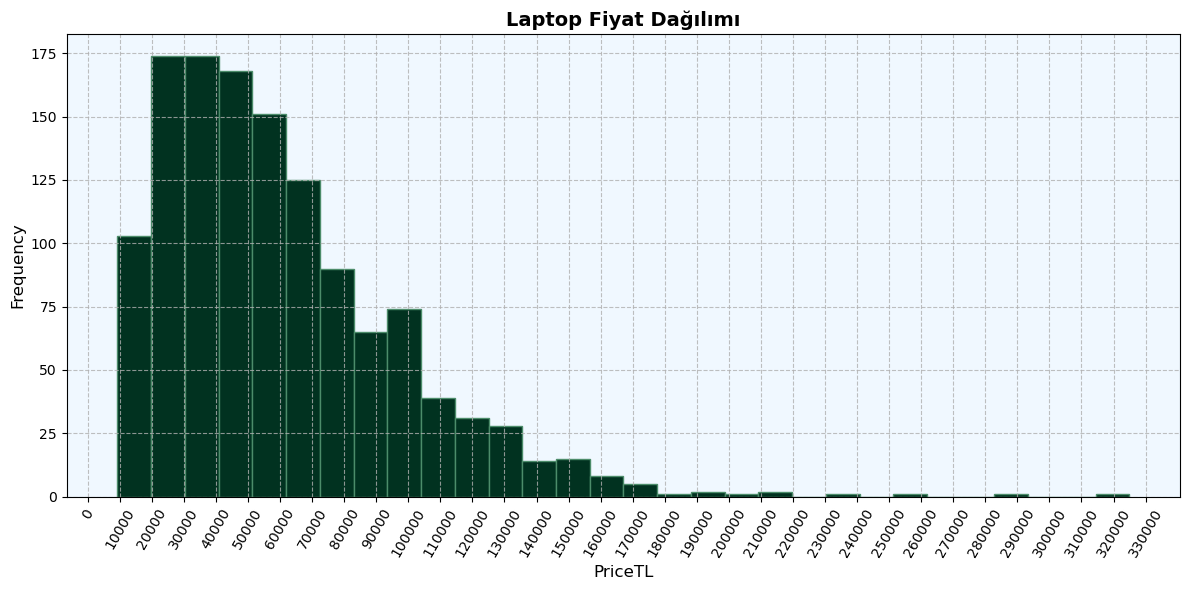

In [44]:
plt.figure(figsize=(12, 6))
plt.hist(df['PriceTL'], bins=30, color='#013220', edgecolor='#4C8C6A') 
plt.title('Laptop Fiyat Daƒüƒ±lƒ±mƒ±', fontsize=14, fontweight='bold') 
plt.xlabel('PriceTL', fontsize=12)   
plt.ylabel('Frequency', fontsize=12) 
plt.grid(True, linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')  
plt.xticks(ticks=range(0, int(df['PriceTL'].max())+10000, 10000), rotation=60)
plt.tight_layout()
plt.show()

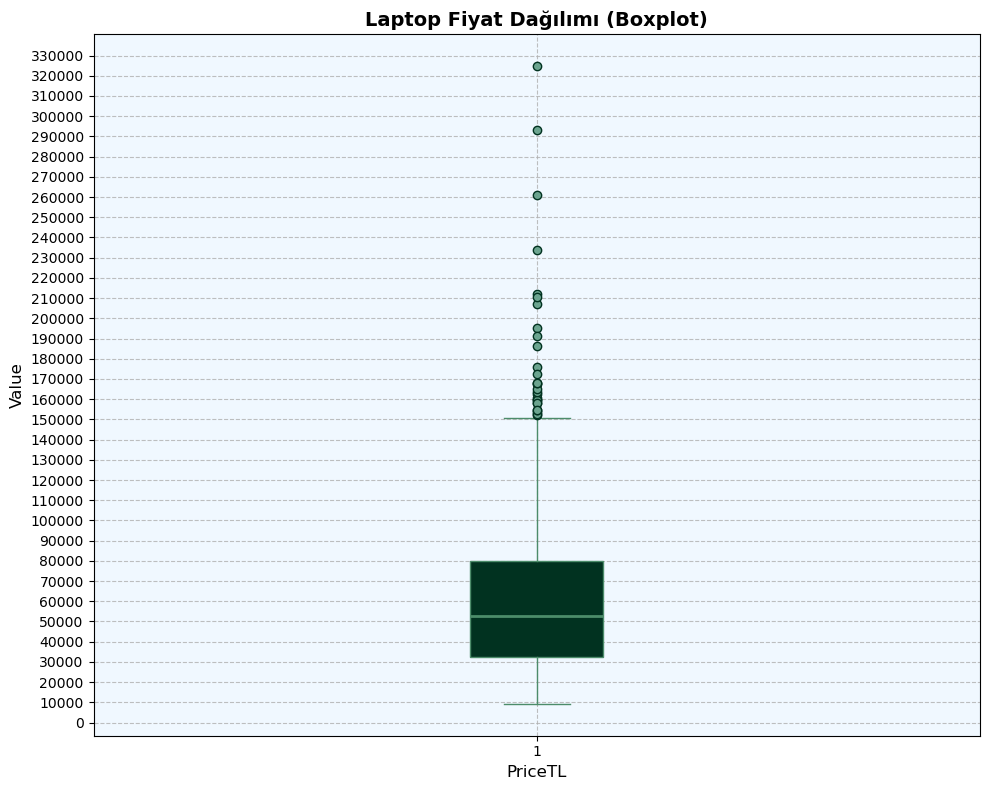

In [45]:
plt.figure(figsize=(10, 8))
plt.boxplot(df['PriceTL'], patch_artist=True,
            boxprops=dict(facecolor='#013220', color='#4C8C6A'),
            medianprops=dict(color='#4C8C6A', linewidth=2),
            whiskerprops=dict(color='#4C8C6A'),
            capprops=dict(color='#4C8C6A'),
            flierprops=dict(markerfacecolor='#6BA48F', marker='o', markersize=6, linestyle='none', markeredgecolor='#013220'))
plt.title('Laptop Fiyat Daƒüƒ±lƒ±mƒ± (Boxplot)', fontsize=14, fontweight='bold')
plt.xlabel('PriceTL', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(True, linestyle='--', alpha=0.8)
plt.yticks(ticks=range(0, int(df['PriceTL'].max())+10000, 10000))
plt.tight_layout()
plt.show()

In [46]:
df.describe().T

count          mean           std      min        25%       50%  \
Inches   1274.0     15.022449      1.429940    10.10     14.000     15.60   
RamGB    1274.0      8.444270      5.098291     2.00      4.000      8.00   
Kg       1274.0      2.040400      0.669444     0.69      1.500      2.04   
PriceTL  1274.0  60503.185071  37333.223017  9270.72  32495.605  52693.92   

              75%        max  
Inches      15.60      18.40  
RamGB        8.00      64.00  
Kg           2.31       4.70  
PriceTL  79773.48  324954.72

<div class="alert alert-block alert-success">

√úst u√ßta (whisker) √ßok daha y√ºksek fiyatlƒ± birka√ß model var, bu da piyasada pahalƒ± modellerin bulunduƒüunu g√∂steriyor.
Veri setinde u√ß deƒüerler (√ßok pahalƒ± laptoplar) mevcut g√∂z√ºk√ºyor.

<div class="alert alert-block alert-success">

### <span style=" color:red"> Company-wise Analysis:

- Bir √ßubuk grafik kullanarak her bir ≈üirket i√ßin diz√ºst√º bilgisayar sayƒ±sƒ±nƒ± √ßizip, yine her bir ≈üirket i√ßin diz√ºst√º bilgisayarlarƒ±n ortalama fiyatƒ±nƒ± g√∂rselle≈ütireceƒüiz.

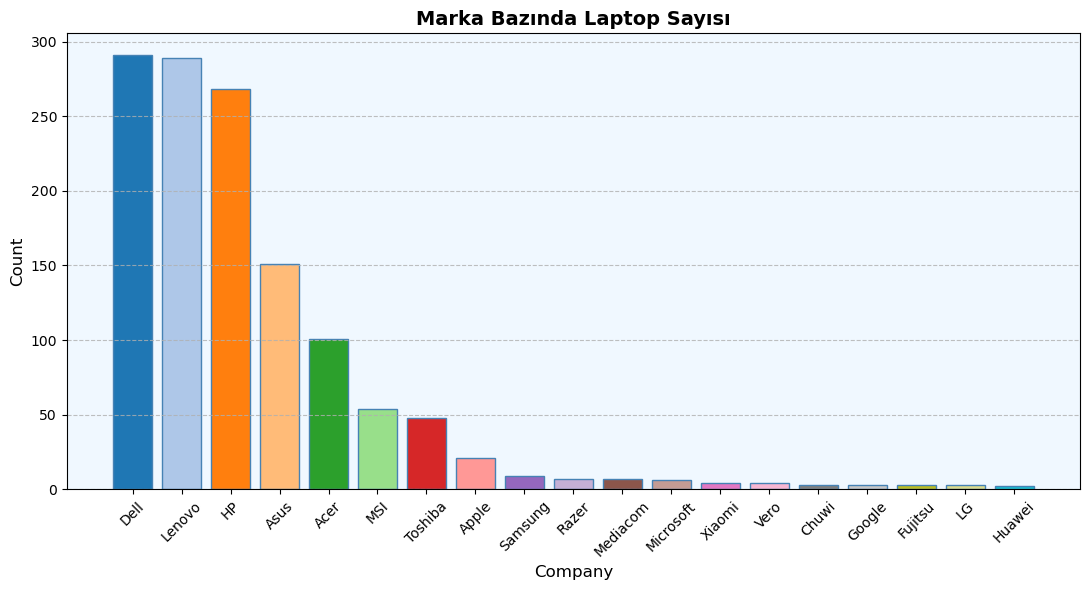

In [47]:
company_counts = df['Company'].value_counts()
colors = plt.cm.tab20.colors 
plt.figure(figsize=(11,6))
plt.bar(company_counts.index, company_counts.values, 
        color=colors[:20], edgecolor='#4682B4') 
plt.title('Marka Bazƒ±nda Laptop Sayƒ±sƒ±', fontsize=14, fontweight='bold')
plt.xlabel('Company', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.tight_layout()
plt.show()

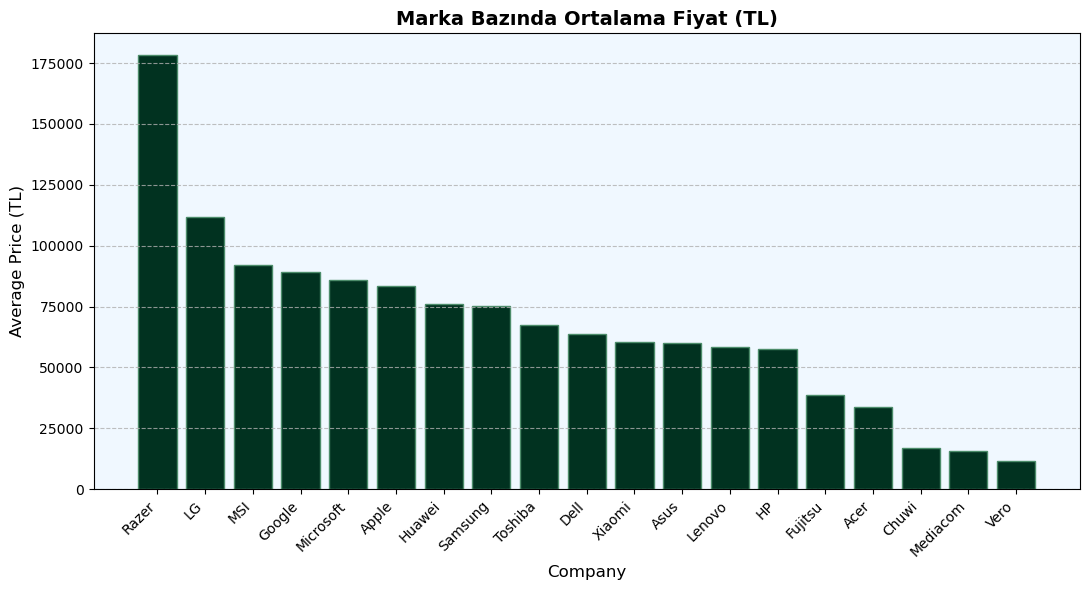

In [48]:
avg_price_by_company = df.groupby('Company')['PriceTL'].mean().sort_values(ascending=False)
plt.figure(figsize=(11,6))
colors = plt.cm.tab20.colors  
plt.bar(avg_price_by_company.index, avg_price_by_company.values,color='#013220', edgecolor='#4C8C6A')

plt.title('Marka Bazƒ±nda Ortalama Fiyat (TL)', fontsize=14, fontweight='bold')
plt.xlabel('Company', fontsize=12)
plt.ylabel('Average Price (TL)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> INCH vs PRICE   and   RAM vs PRICE Analysis:

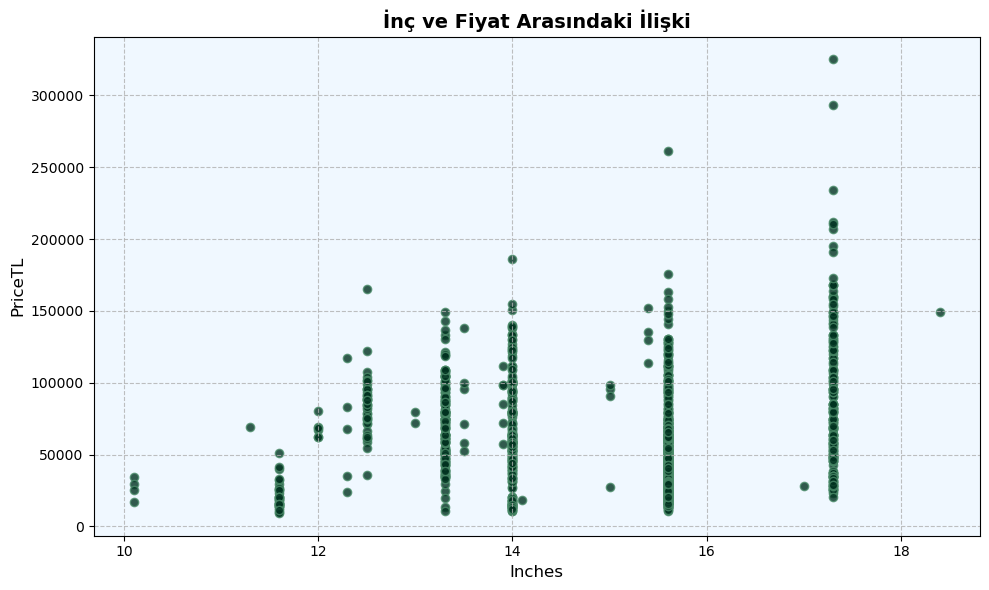

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Inches'], df['PriceTL'], color='#013220', edgecolors='#4C8C6A', alpha=0.8)
plt.title('ƒ∞n√ß ve Fiyat Arasƒ±ndaki ƒ∞li≈üki', fontsize=14, fontweight='bold') 
plt.xlabel('Inches', fontsize=12)  
plt.ylabel('PriceTL', fontsize=12)   
plt.grid(True, linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')  
plt.tight_layout()
plt.show()

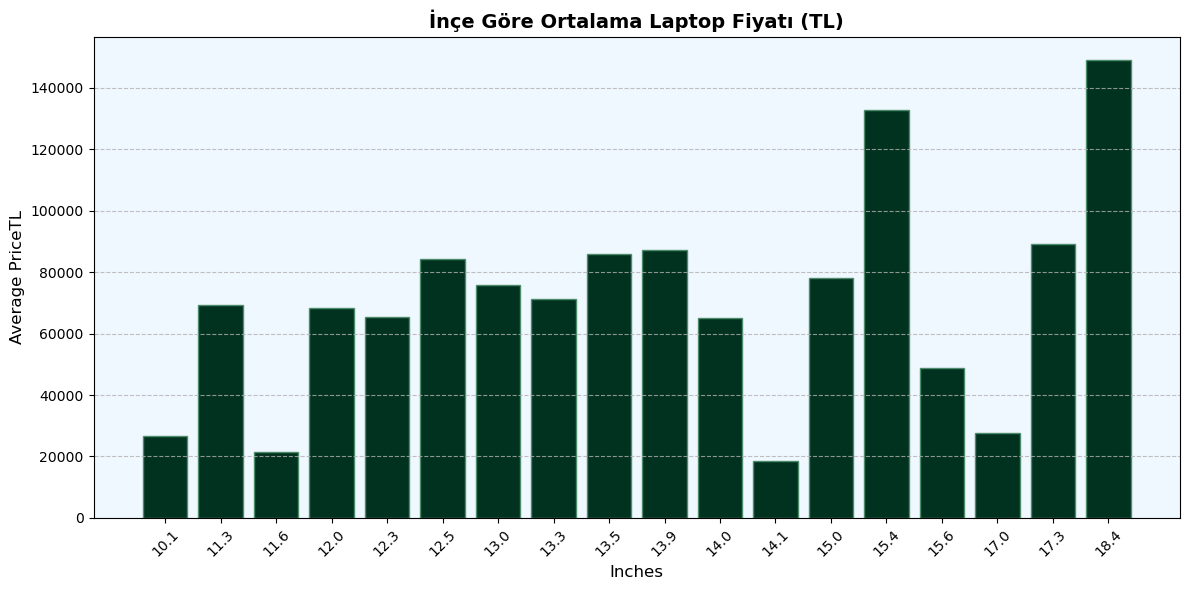

In [50]:
inch_avg_price = df.groupby('Inches')['PriceTL'].mean().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(inch_avg_price.index.astype(str), inch_avg_price.values, color='#013220', edgecolor='#4C8C6A')
plt.title('ƒ∞n√ße G√∂re Ortalama Laptop Fiyatƒ± (TL)', fontsize=14, fontweight='bold')
plt.xlabel('Inches', fontsize=12)
plt.ylabel('Average PriceTL', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

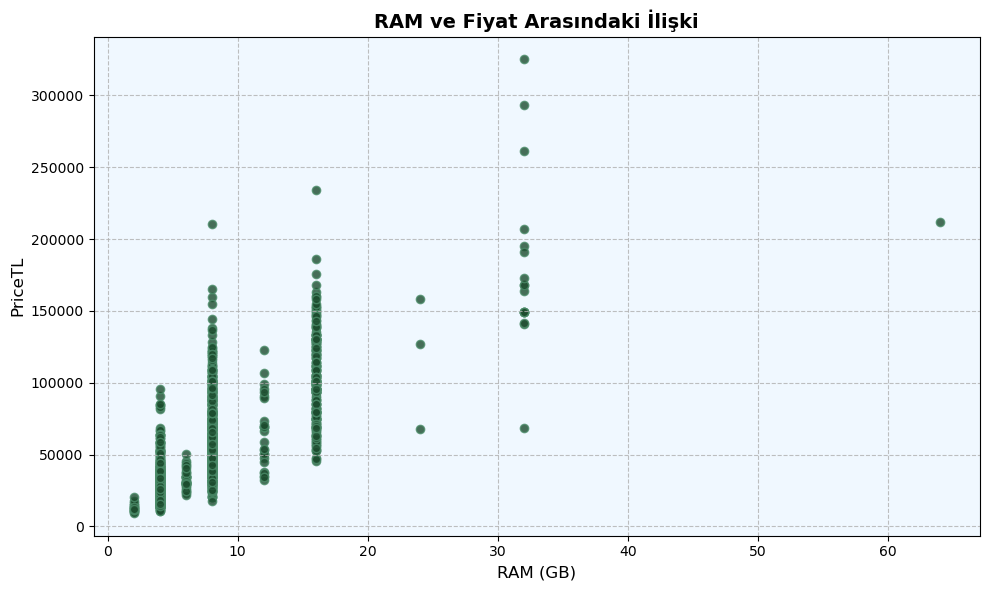

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(df['RamGB'], df['PriceTL'], color='#1C4C2E', edgecolors='#4C8C6A', alpha=0.8)
plt.title('RAM ve Fiyat Arasƒ±ndaki ƒ∞li≈üki', fontsize=14, fontweight='bold')
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('PriceTL', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.tight_layout()
plt.show()


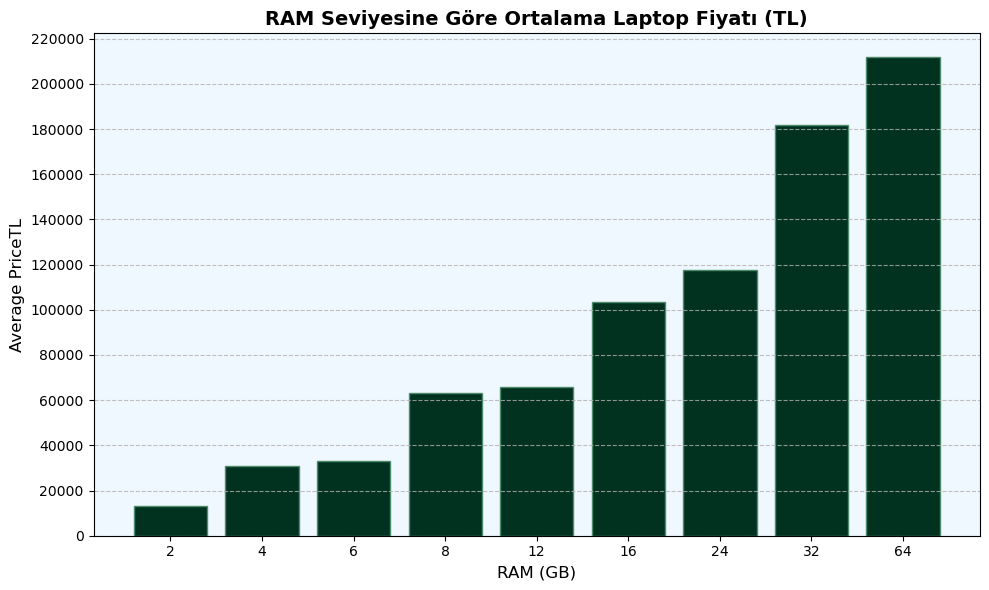

In [52]:
ram_avg_price = df.groupby('RamGB')['PriceTL'].mean().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(ram_avg_price.index.astype(str), ram_avg_price.values, color='#013220', edgecolor='#4C8C6A')
plt.title('RAM Seviyesine G√∂re Ortalama Laptop Fiyatƒ± (TL)', fontsize=14, fontweight='bold')
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Average PriceTL', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.yticks(ticks=range(0, int(ram_avg_price.max())+20000, 20000))
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> Operating System Market Share:

- Diz√ºst√º bilgisayarlarƒ±n Opsys'e g√∂re daƒüƒ±lƒ±mƒ±nƒ± g√∂stermek i√ßin bir pasta grafikolu≈üturuyoruz. 

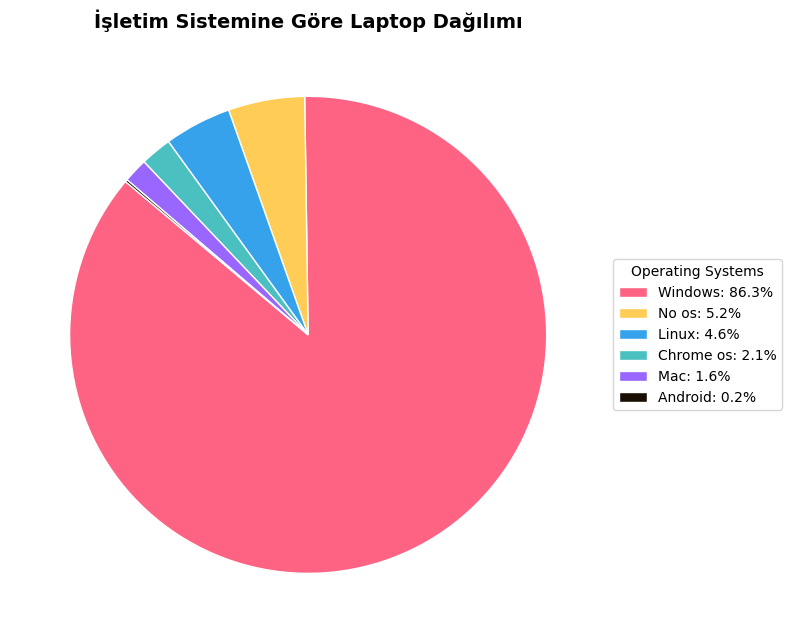

In [53]:
opsys_counts = df['Opsys'].value_counts()
colors = ['#FF6384','#FFCD56','#36A2EB','#4BC0C0','#9966FF',"#1A0E02",]  
plt.figure(figsize=(8,8))
wedges, texts = plt.pie(
    opsys_counts.values,
    labels=None,  
    startangle=140,
    colors=colors[:len(opsys_counts)],
    wedgeprops={'edgecolor': 'white', 'linewidth': 1})
labels_with_pct = [
    f"{name}: {pct:.1f}%" for name, pct in zip(
        opsys_counts.index,
        100 * opsys_counts.values / opsys_counts.values.sum())]

plt.legend(wedges, labels_with_pct, title="Operating Systems", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title('ƒ∞≈ületim Sistemine G√∂re Laptop Daƒüƒ±lƒ±mƒ±', fontsize=14, fontweight='bold')
plt.gca().set_facecolor('#F0F8FF')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> Weight Distribution:

- Diz√ºst√º bilgisayarlarƒ±n aƒüƒ±rlƒ±k daƒüƒ±lƒ±mƒ±nƒ± analiz etmek i√ßin bir histogram √ßiziyoruz.

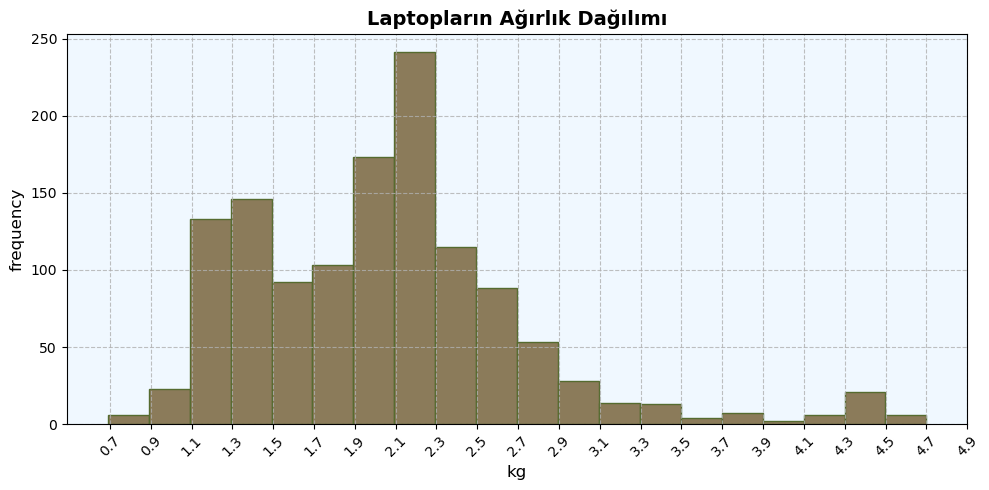

In [54]:
plt.figure(figsize=(10, 5))
hist_colors = ['#556B2F','#8B7B5A','#A0522D'] 
plt.hist(df['Kg'], bins=int((df['Kg'].max() - df['Kg'].min()) / 0.2), color=hist_colors[1], edgecolor=hist_colors[0])
plt.title('Laptoplarƒ±n Aƒüƒ±rlƒ±k Daƒüƒ±lƒ±mƒ±', fontsize=14, fontweight='bold')
plt.xlabel('kg', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
# 0.2 kg aralƒ±klarla x ekseni
ticks = [round(x, 1) for x in list(np.arange(df['Kg'].min(), df['Kg'].max()+0.2, 0.2))]
plt.xticks(ticks=ticks, rotation=45)  
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> Price Correlation Analysis:

- Sayƒ±sal s√ºtunlar (ƒ∞n√ß, Aƒüƒ±rlƒ±k, Ram, vb.) ve Fiyat arasƒ±ndaki korelasyonu hesaplayƒ±p g√∂rselle≈ütireceƒüiz.

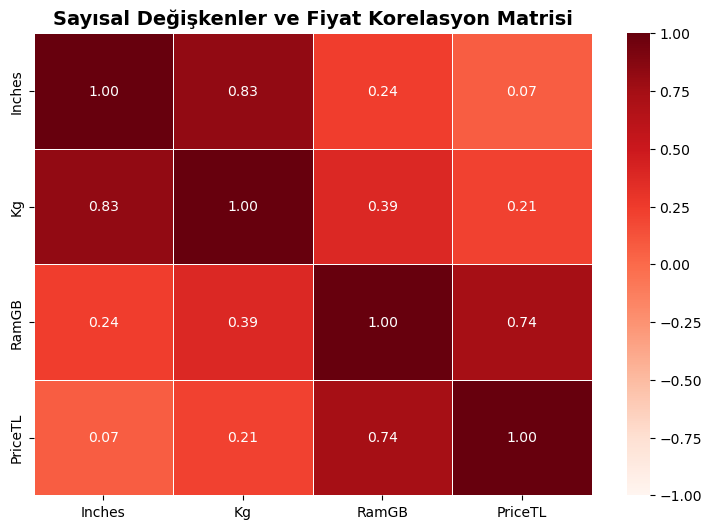

In [55]:
num_cols = ['Inches', 'Kg', 'RamGB', 'PriceTL']
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(9, 6))
sns.heatmap(corr_matrix, annot=True, cmap="Reds", fmt=".2f",
    linewidths=0.5, cbar=True, vmin=-1, vmax=1)
plt.title('Sayƒ±sal Deƒüi≈ükenler ve Fiyat Korelasyon Matrisi', fontsize=14, fontweight='bold')
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> ScreenResolution Impact on Price:

- Farklƒ± √ß√∂z√ºn√ºrl√ºk t√ºrlerinin (√∂r. Full HD, 4K) fiyatƒ± nasƒ±l etkilediƒüini analiz ediyoruz.

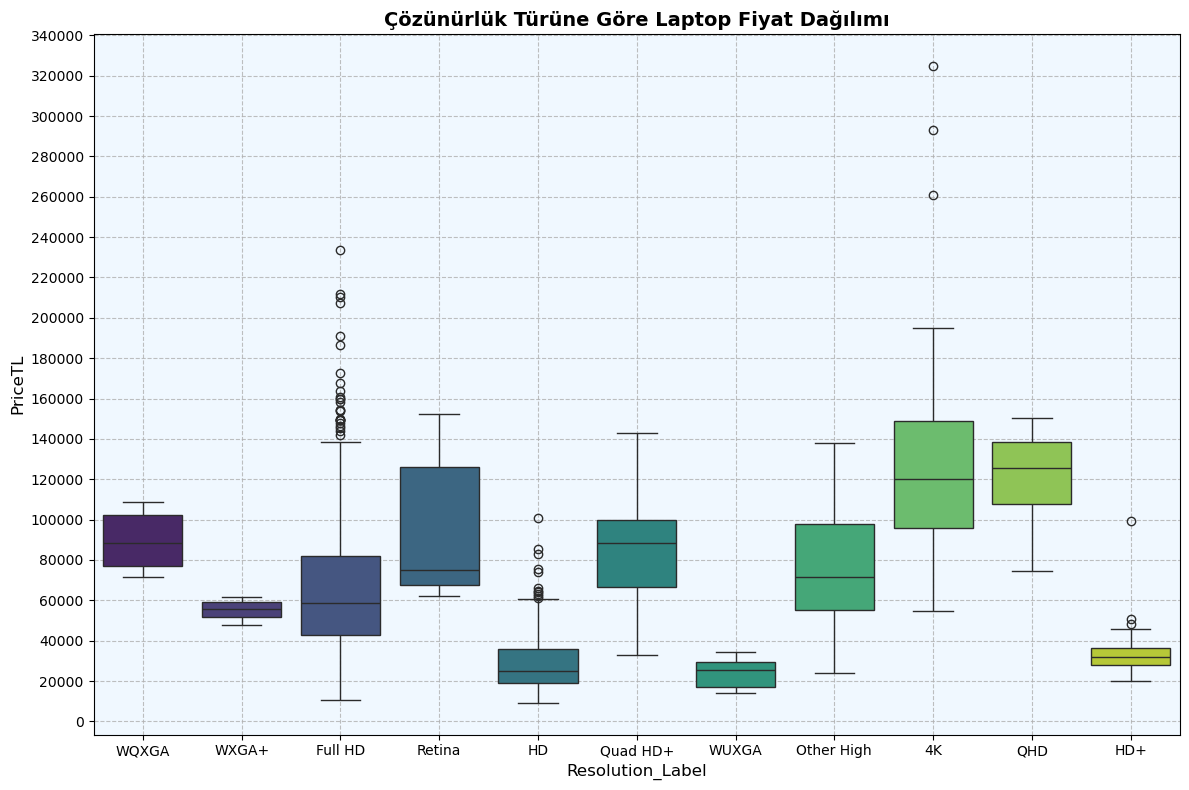

In [56]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Resolution_Label', y='PriceTL', data=df, palette='viridis')
plt.title('√á√∂z√ºn√ºrl√ºk T√ºr√ºne G√∂re Laptop Fiyat Daƒüƒ±lƒ±mƒ±', fontsize=14, fontweight='bold')
plt.xlabel('Resolution_Label', fontsize=12)
plt.ylabel('PriceTL', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.yticks(ticks=range(0, int(df['PriceTL'].max())+20000, 20000))
plt.tight_layout()
plt.show()

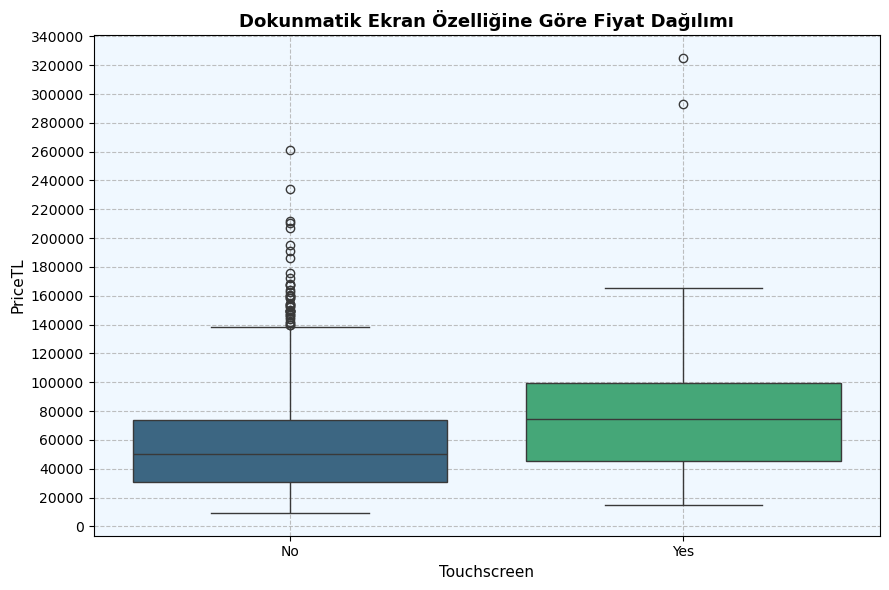

In [57]:
plt.figure(figsize=(9, 6))
sns.boxplot(x='Touchscreen', y='PriceTL', data=df, palette='viridis')
plt.title('Dokunmatik Ekran √ñzelliƒüine G√∂re Fiyat Daƒüƒ±lƒ±mƒ±', fontsize=13, fontweight='bold')
plt.xlabel('Touchscreen', fontsize=11)
plt.ylabel('PriceTL', fontsize=11)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(True, linestyle='--', alpha=0.8)
plt.yticks(ticks=range(0, int(df['PriceTL'].max())+20000, 20000))
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> Top CPU/GPU Manufacturers:

- En yaygƒ±n CPU ve GPU √ºreticilerini g√∂rselle≈ütireceƒüiz.

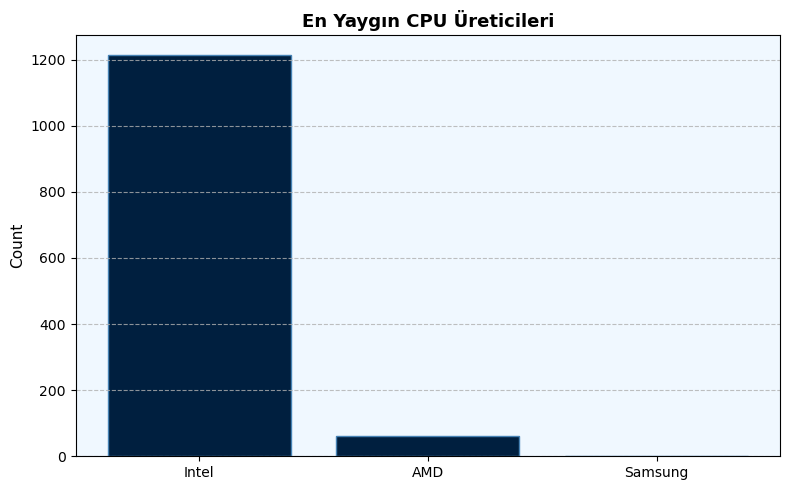

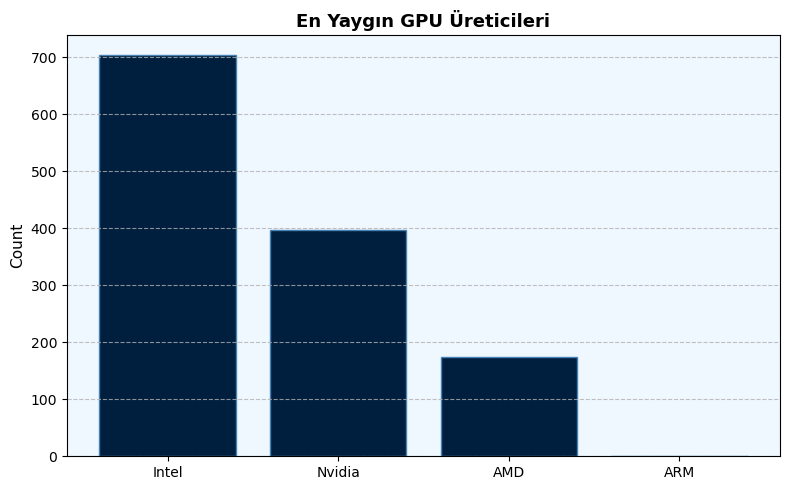

In [58]:
# En yaygƒ±n CPU √ºreticileri
cpu_counts = df['Cpu_Brand'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(cpu_counts.index, cpu_counts.values, color='#001F3F', edgecolor='#4682B4')
plt.title('En Yaygƒ±n CPU √úreticileri', fontsize=13, fontweight='bold')
plt.ylabel('Count', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.tight_layout()
plt.show()

# En yaygƒ±n GPU √ºreticileri
gpu_counts = df['Gpu_Brand'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(gpu_counts.index, gpu_counts.values, color='#001F3F', edgecolor='#4682B4')
plt.title('En Yaygƒ±n GPU √úreticileri', fontsize=13, fontweight='bold')
plt.ylabel('Count', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> RAM Analysis:

- En yaygƒ±n RAM konfig√ºrasyonlarƒ±nƒ± ve bunlarƒ±n ortalama fiyatlarƒ±nƒ± belirliyoruz.

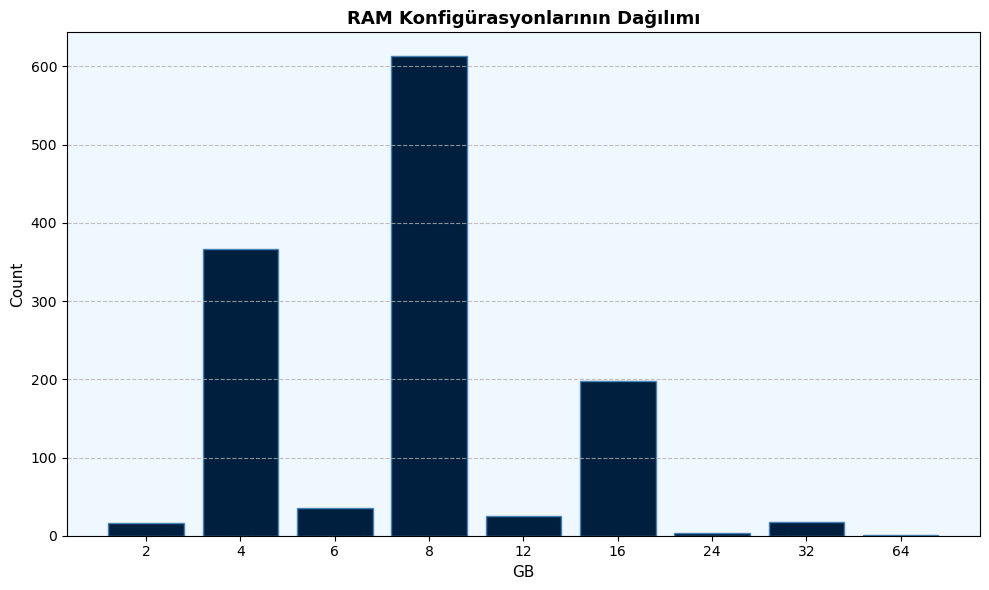

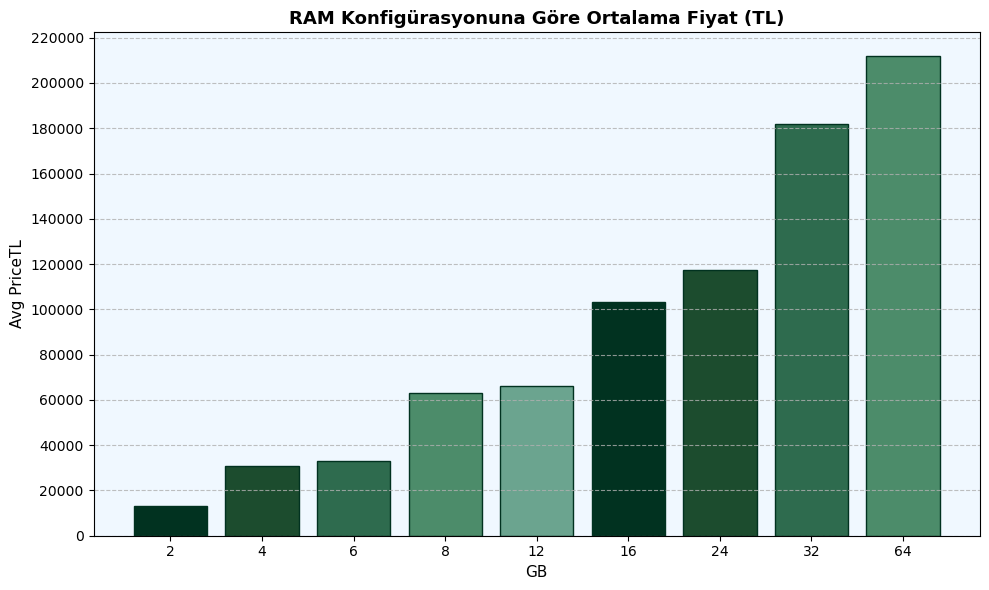

In [59]:
ram_counts = df['RamGB'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(ram_counts.index.astype(str), ram_counts.values, color='#001F3F', edgecolor='#4682B4')
plt.title('RAM Konfig√ºrasyonlarƒ±nƒ±n Daƒüƒ±lƒ±mƒ±', fontsize=13, fontweight='bold')
plt.xlabel('GB', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.tight_layout()
plt.show()

ram_avg_price = df.groupby('RamGB')['PriceTL'].mean().sort_index()

green_palette = ['#013220', '#1C4C2E', '#2E6B4E', '#4C8C6A', '#6BA48F']

bar_colors = (green_palette * ((len(ram_avg_price) // len(green_palette)) + 1))[:len(ram_avg_price)]

plt.figure(figsize=(10, 6))
plt.bar(ram_avg_price.index.astype(str), ram_avg_price.values, color=bar_colors, edgecolor='#013220')
plt.title('RAM Konfig√ºrasyonuna G√∂re Ortalama Fiyat (TL)', fontsize=13, fontweight='bold')
plt.xlabel('GB', fontsize=11)
plt.ylabel('Avg PriceTL', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.yticks(ticks=range(0, int(ram_avg_price.max())+20000, 20000))
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> Memory Type and Price Relationship:

- Bellek t√ºr√ºn√ºn (√∂rn. HDD, SSD, Hibrit) fiyat √ºzerindeki etkisini analiz ediyoruz.

In [60]:
# Bellek t√ºr√ºn√º ayƒ±klayan fonksiyon
def extract_memory_type(text):
    text = text.lower()
    if 'ssd' in text and 'hdd' in text:
        return 'Hybrid'
    elif 'flash storage' in text:
        return 'Flash Storage'
    elif 'hybrid' in text:
        return 'Hybrid'
    elif 'ssd' in text:
        return 'SSD'
    elif 'hdd' in text:
        return 'HDD'
    else:
        return 'Other'
df['Memory_Type'] = df['Memory'].apply(extract_memory_type)

In [61]:
df['Memory_Type'].value_counts()

Memory_Type
SSD              635
HDD              358
Hybrid           210
Flash Storage     71
Name: count, dtype: int64

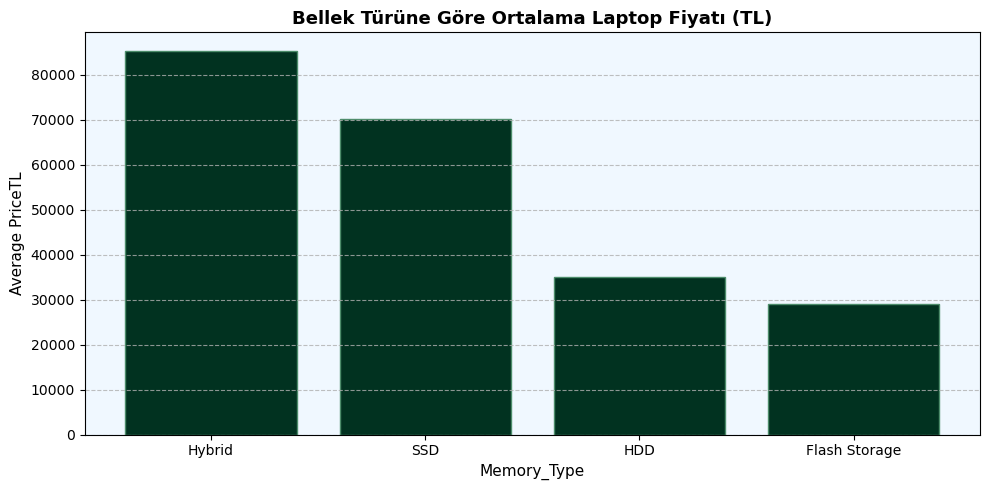

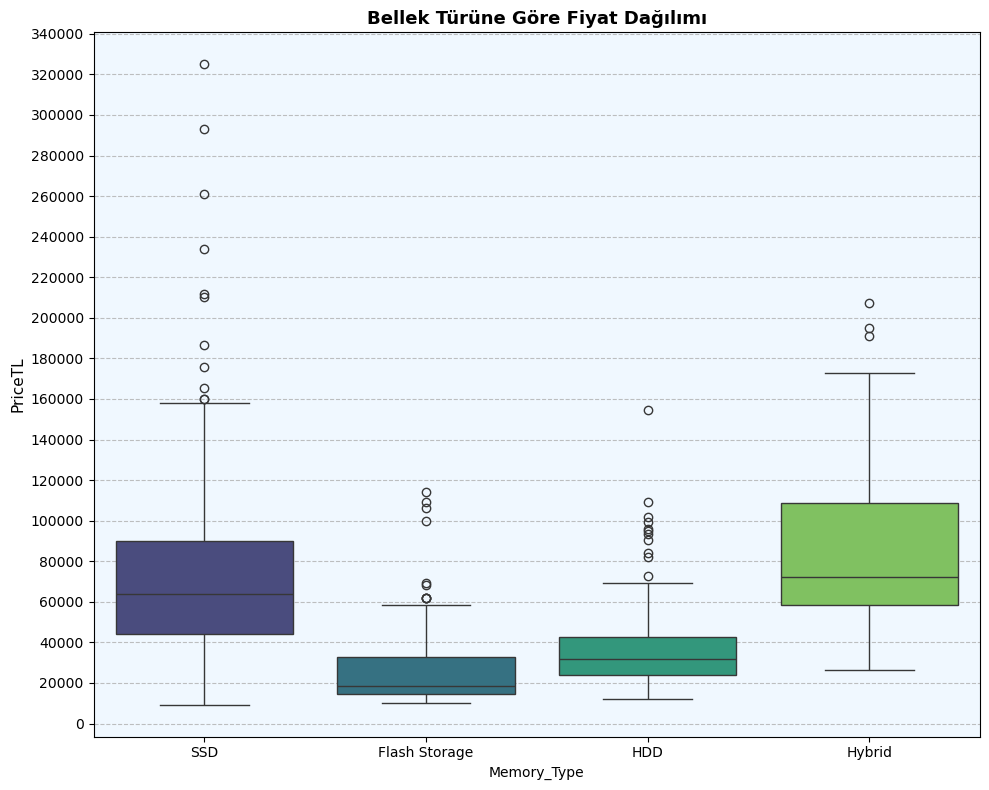

In [62]:
mem_price = df.groupby('Memory_Type')['PriceTL'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(mem_price.index, mem_price.values, color='#013220', edgecolor='#4C8C6A')
plt.title('Bellek T√ºr√ºne G√∂re Ortalama Laptop Fiyatƒ± (TL)', fontsize=13, fontweight='bold')
plt.xlabel('Memory_Type', fontsize=11)
plt.ylabel('Average PriceTL', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.gca().set_facecolor('#F0F8FF')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.boxplot(x='Memory_Type', y='PriceTL', data=df, palette='viridis')
plt.title('Bellek T√ºr√ºne G√∂re Fiyat Daƒüƒ±lƒ±mƒ±', fontsize=13, fontweight='bold')
plt.ylabel('PriceTL', fontsize=11)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.yticks(ticks=range(0, int(df['PriceTL'].max())+20000, 20000))
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> High-end Laptop Analysis:

- ‚Äú√úst d√ºzey‚Äù diz√ºst√º bilgisayarƒ± tanƒ±mlayƒ±p (√∂rneƒüin, Fiyat veya teknik √∂zelliklere g√∂re) √∂zelliklerini analiz ediyoruz.

√úst D√ºzey Laptoplarƒ±n Temel ƒ∞statistikleri:
         count           mean           std       min        25%         50%  \
Inches   256.0      15.126563      1.629507     12.30     13.975      15.600   
RamGB    256.0      13.984375      6.905507      4.00      8.000      16.000   
Kg       256.0       2.226922      1.082476      0.91      1.320       1.950   
PriceTL  256.0  119161.494336  31914.175242  88924.32  98461.440  109168.055   

               75%        max  
Inches       17.30      18.40  
RamGB        16.00      64.00  
Kg            2.90       4.70  
PriceTL  130482.72  324954.72  


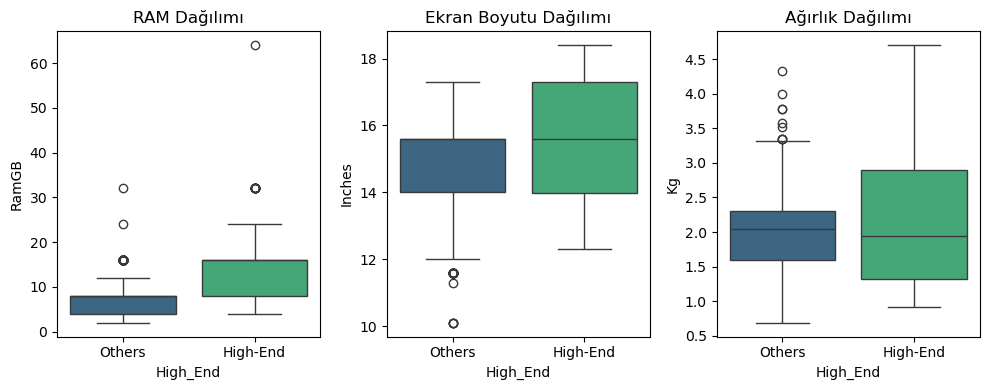

√úst D√ºzey Laptoplarda En Yaygƒ±n ≈ûirketler:
Company
Dell         59
Lenovo       59
HP           45
Asus         30
MSI          26
Toshiba      10
Apple         7
Razer         6
Samsung       4
Microsoft     3
LG            3
Acer          3
Google        1
Name: count, dtype: int64

√úst D√ºzey Laptoplarda Bellek T√ºrleri:
Memory_Type
SSD              167
Hybrid            77
HDD                8
Flash Storage      4
Name: count, dtype: int64


In [63]:
# √úst d√ºzey laptoplar i√ßin fiyat e≈üiƒüi (en √ºst %20'lik dilim)
price_threshold = df['PriceTL'].quantile(0.80) 

df['High_End'] = np.where(df['PriceTL'] >= price_threshold, 'High-End', 'Others')

# √úst d√ºzey laptoplarƒ±n temel istatistikleri
high_end_stats = df[df['High_End'] == 'High-End'].describe().T
print("√úst D√ºzey Laptoplarƒ±n Temel ƒ∞statistikleri:")
print(high_end_stats)

plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x='High_End', y='RamGB', data=df, palette='viridis')
plt.title('RAM Daƒüƒ±lƒ±mƒ±')

plt.subplot(1, 3, 2)
sns.boxplot(x='High_End', y='Inches', data=df, palette='viridis')
plt.title('Ekran Boyutu Daƒüƒ±lƒ±mƒ±')

plt.subplot(1, 3, 3)
sns.boxplot(x='High_End', y='Kg', data=df, palette='viridis')
plt.title('Aƒüƒ±rlƒ±k Daƒüƒ±lƒ±mƒ±')

plt.tight_layout()
plt.show()

# √úst d√ºzey laptoplarda en yaygƒ±n ≈üirketler ve bellek t√ºrleri
print("√úst D√ºzey Laptoplarda En Yaygƒ±n ≈ûirketler:")
print(df[df['High_End'] == 'High-End']['Company'].value_counts())

print("\n√úst D√ºzey Laptoplarda Bellek T√ºrleri:")
print(df[df['High_End'] == 'High-End']['Memory_Type'].value_counts())

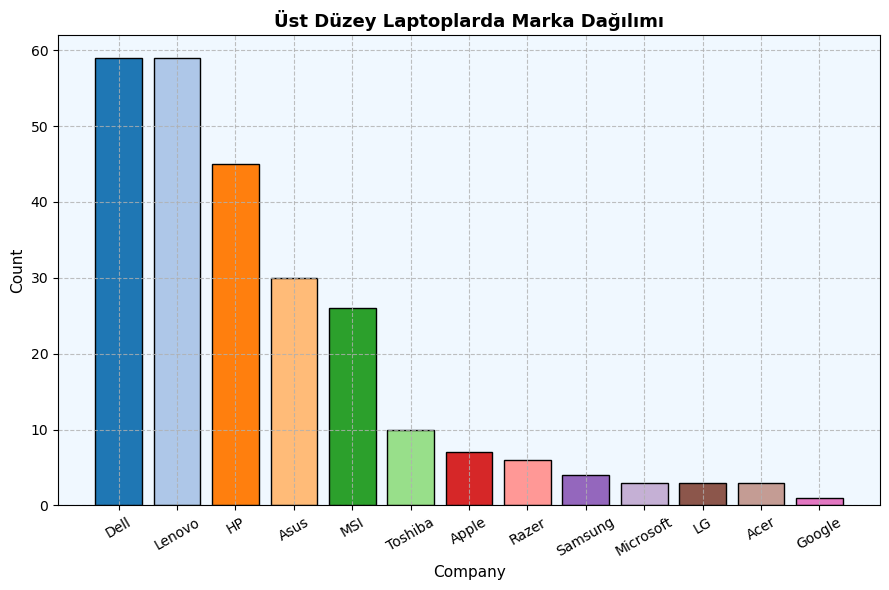

In [64]:
high_end_comp_counts = df[df['High_End'] == 'High-End']['Company'].value_counts()
colors = plt.cm.tab20.colors 
plt.figure(figsize=(9, 6))
plt.bar(high_end_comp_counts.index, high_end_comp_counts.values, 
        color=colors[:len(high_end_comp_counts)], edgecolor='black') 
plt.title('√úst D√ºzey Laptoplarda Marka Daƒüƒ±lƒ±mƒ±', fontsize=13, fontweight='bold')
plt.xlabel('Company', fontsize=11)  # T√ºrk√ßeye √ßevirdim
plt.ylabel('Count', fontsize=11)   # T√ºrk√ßeye √ßevirdim
plt.xticks(rotation=30)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()


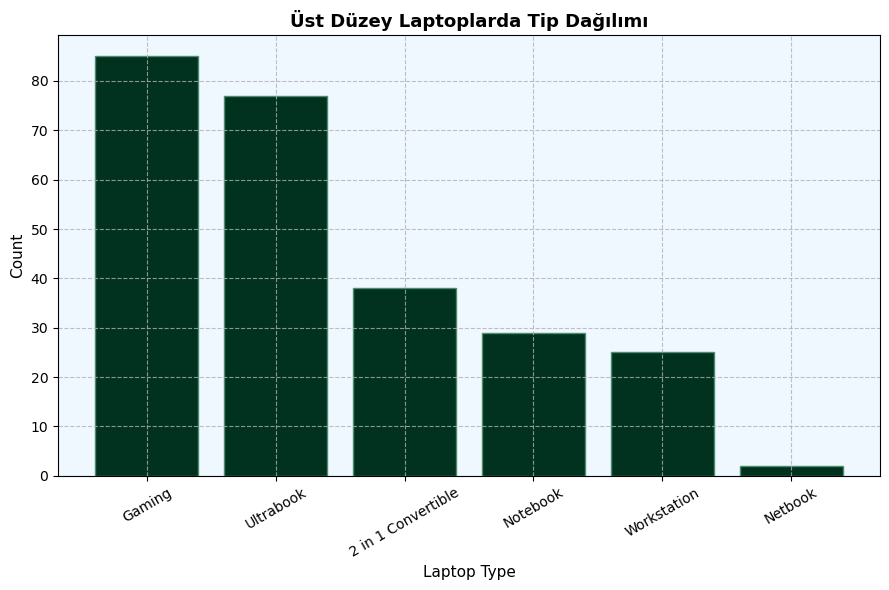

In [65]:
high_end_type_counts = df[df['High_End'] == 'High-End']['Type'].value_counts()

plt.figure(figsize=(9, 6))
plt.bar(high_end_type_counts.index, high_end_type_counts.values, color='#013220', edgecolor='#4C8C6A')
plt.title('√úst D√ºzey Laptoplarda Tip Daƒüƒ±lƒ±mƒ±', fontsize=13, fontweight='bold')
plt.xlabel('Laptop Type', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.xticks(rotation=30)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

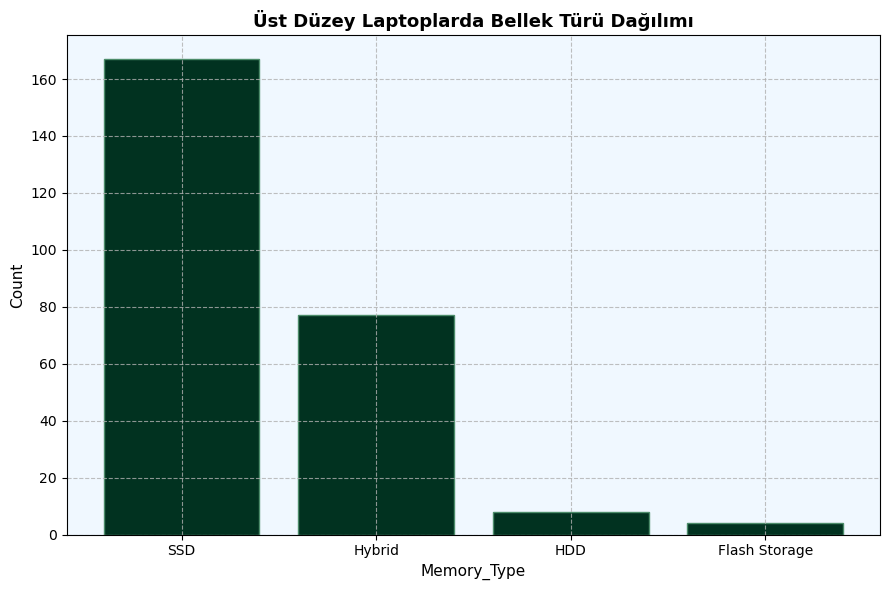

In [66]:
high_end_type_counts = df[df['High_End'] == 'High-End']['Memory_Type'].value_counts()

plt.figure(figsize=(9, 6))
plt.bar(high_end_type_counts.index, high_end_type_counts.values, color='#013220', edgecolor='#4C8C6A')
plt.title('√úst D√ºzey Laptoplarda Bellek T√ºr√º Daƒüƒ±lƒ±mƒ±', fontsize=13, fontweight='bold')
plt.xlabel('Memory_Type', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(True, linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

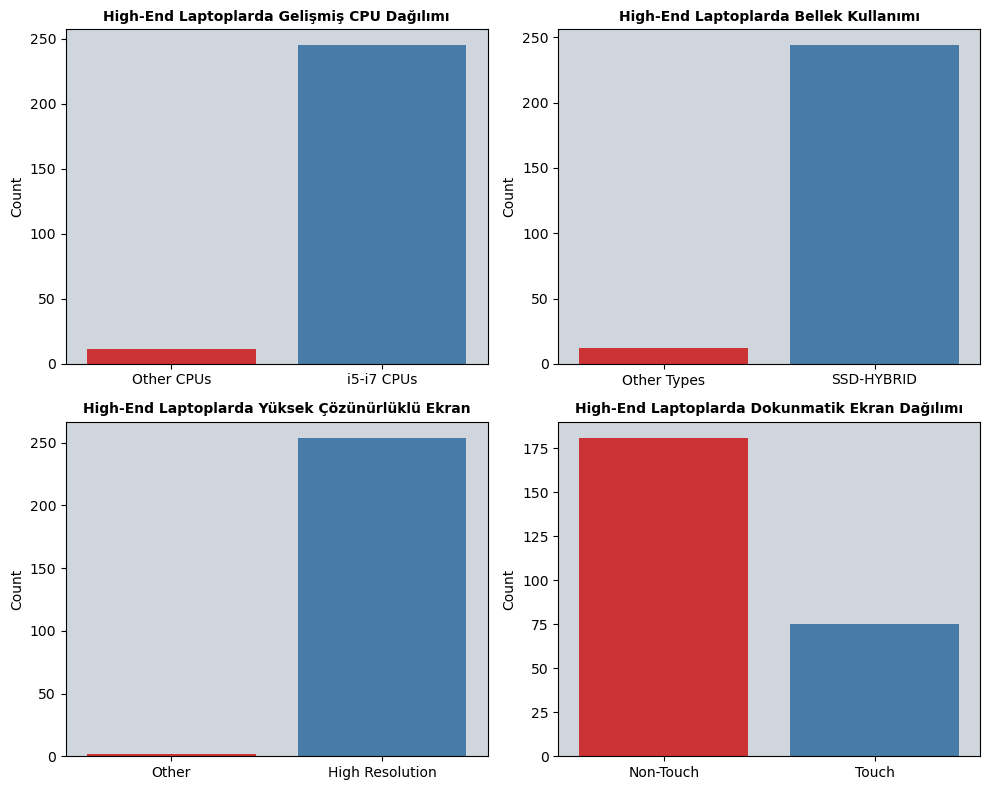

In [67]:
high_end = df[df['High_End'] == 'High-End']

# √ñzellik s√ºtunlarƒ± hazƒ±rlanƒ±yor (√∂nceki h√ºcrelerden kopyalanarak)
high_end['Advanced_CPU'] = high_end['Cpu_Type'].fillna('').str.lower().str.contains('i5|i7')
high_end['SSD_Hybrid'] = high_end['Memory_Type'].fillna('').str.upper().str.contains('SSD|HYBRID')
high_end['High_Res'] = high_end['Resolution_Label'].isin([
    "Full HD", "4K", "Quad HD+", "QHD", "Retina", "WQXGA", "WUXGA", "Other High"
])

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# 1. Geli≈ümi≈ü CPU
cpu_counts = high_end['Advanced_CPU'].value_counts().sort_index()
cpu_labels = ['Other CPUs', 'i5-i7 CPUs']
sns.barplot(x=cpu_labels, y=cpu_counts.values, palette="Set1", ax=axes[0, 0])
axes[0, 0].set_title('High-End Laptoplarda Geli≈ümi≈ü CPU Daƒüƒ±lƒ±mƒ±', fontsize=10, fontweight='bold')
axes[0, 0].set_facecolor('#CFD6DD')
axes[0, 0].set_ylabel('Count')

# 2. Bellek Kullanƒ±mƒ±
storage_counts = high_end['SSD_Hybrid'].value_counts().sort_index()
storage_labels = ['Other Types', 'SSD-HYBRID']
sns.barplot(x=storage_labels, y=storage_counts.values, palette="Set1", ax=axes[0, 1])
axes[0, 1].set_title('High-End Laptoplarda Bellek Kullanƒ±mƒ±', fontsize=10, fontweight='bold')
axes[0, 1].set_facecolor('#CFD6DD')
axes[0, 1].set_ylabel('Count')

# 3. Y√ºksek √á√∂z√ºn√ºrl√ºkl√º Ekran
res_counts = high_end['High_Res'].value_counts().sort_index()
res_labels = ['Other', 'High Resolution']
sns.barplot(x=res_labels, y=res_counts.values, palette="Set1", ax=axes[1, 0])
axes[1, 0].set_title('High-End Laptoplarda Y√ºksek √á√∂z√ºn√ºrl√ºkl√º Ekran', fontsize=10, fontweight='bold')
axes[1, 0].set_facecolor('#CFD6DD')
axes[1, 0].set_ylabel('Count')

# 4. Dokunmatik Ekran
touch_counts = high_end['Touchscreen'].value_counts().reindex(['No', 'Yes']).fillna(0)
touch_labels = ['Non-Touch', 'Touch']
sns.barplot(x=touch_labels, y=touch_counts.values, palette="Set1", ax=axes[1, 1])
axes[1, 1].set_title('High-End Laptoplarda Dokunmatik Ekran Daƒüƒ±lƒ±mƒ±', fontsize=10, fontweight='bold')
axes[1, 1].set_facecolor('#CFD6DD')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> TypeName Analysis:

- Diz√ºst√º bilgisayar tip daƒüƒ±lƒ±mƒ±nƒ± ve bunun fiyatla ili≈ükisini ke≈üfediyoruz.(√∂rneƒüin, Gaming vs Ultrabook)

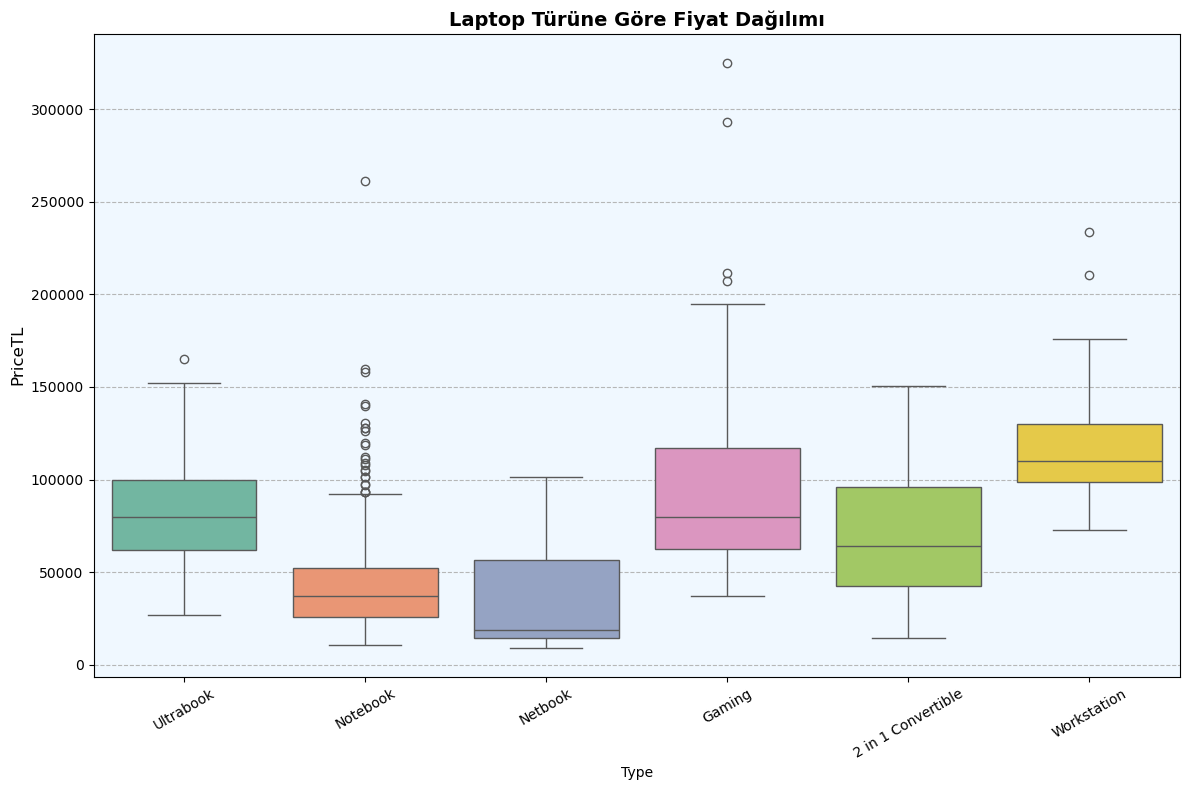

In [68]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Type', y='PriceTL', data=df, palette='Set2')
plt.title('Laptop T√ºr√ºne G√∂re Fiyat Daƒüƒ±lƒ±mƒ±', fontsize=14, fontweight='bold')
plt.ylabel('PriceTL', fontsize=12)
plt.xticks(rotation=30)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.tight_layout()
plt.show()

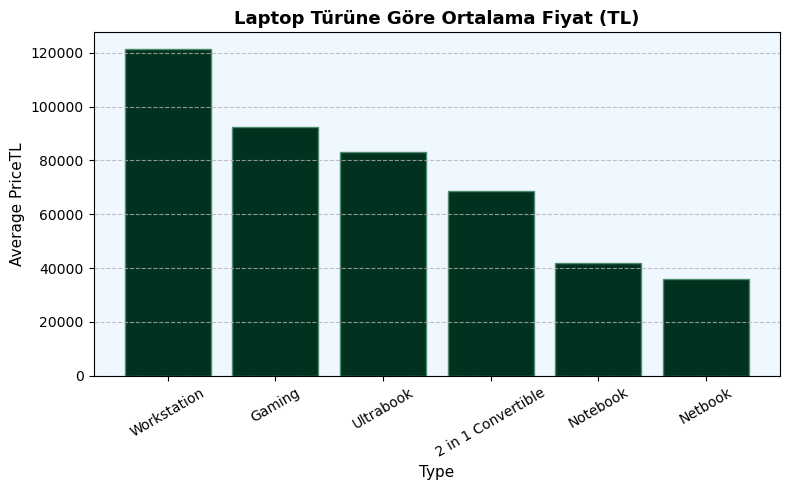

In [69]:
laptop_avg_price = df.groupby('Type')['PriceTL'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
plt.bar(laptop_avg_price.index, laptop_avg_price.values, color='#013220', edgecolor='#4C8C6A')
plt.title('Laptop T√ºr√ºne G√∂re Ortalama Fiyat (TL)', fontsize=13, fontweight='bold')
plt.xlabel('Type', fontsize=11)
plt.ylabel('Average PriceTL', fontsize=11)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

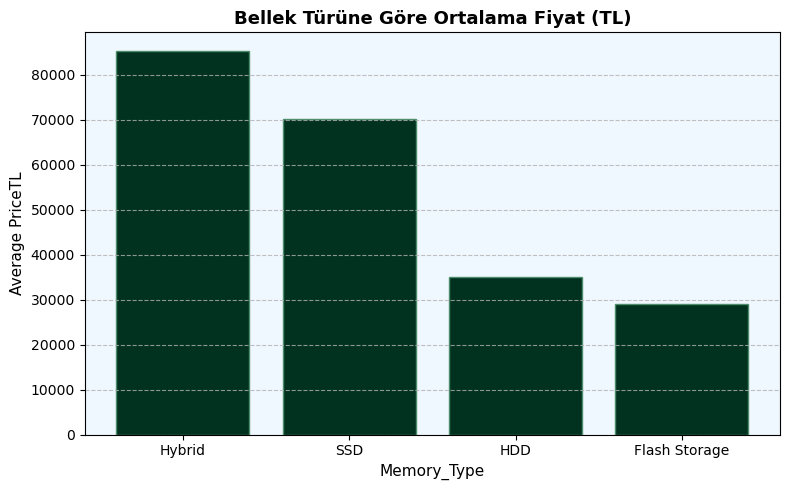

In [70]:
memory_avg_price = df.groupby('Memory_Type')['PriceTL'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
plt.bar(memory_avg_price.index, memory_avg_price.values, color='#013220', edgecolor='#4C8C6A')
plt.title('Bellek T√ºr√ºne G√∂re Ortalama Fiyat (TL)', fontsize=13, fontweight='bold')
plt.xlabel('Memory_Type', fontsize=11)
plt.ylabel('Average PriceTL', fontsize=11)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

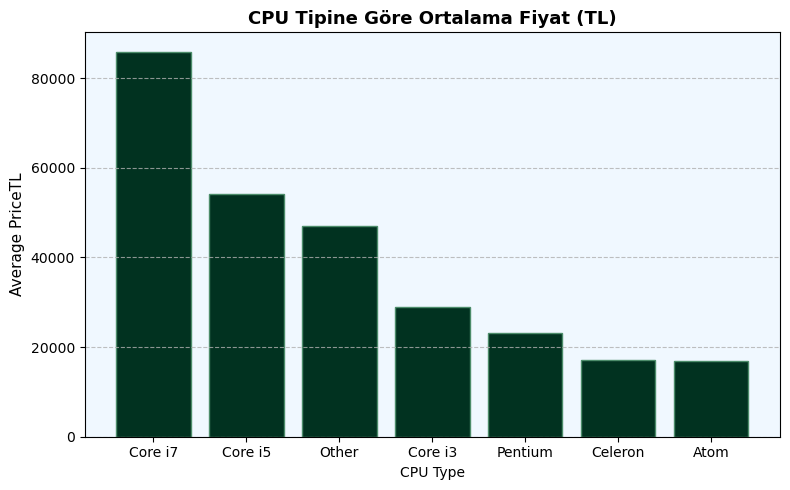

In [71]:
# CPU tipine g√∂re ortalama fiyat
cpu_avg_price = df.groupby('Cpu_Type')['PriceTL'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
plt.bar(cpu_avg_price.index, cpu_avg_price.values, color='#013220', edgecolor='#4C8C6A')
plt.title('CPU Tipine G√∂re Ortalama Fiyat (TL)', fontsize=13, fontweight='bold')
plt.xlabel('CPU Type', fontsize=10)
plt.ylabel('Average PriceTL', fontsize=11)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

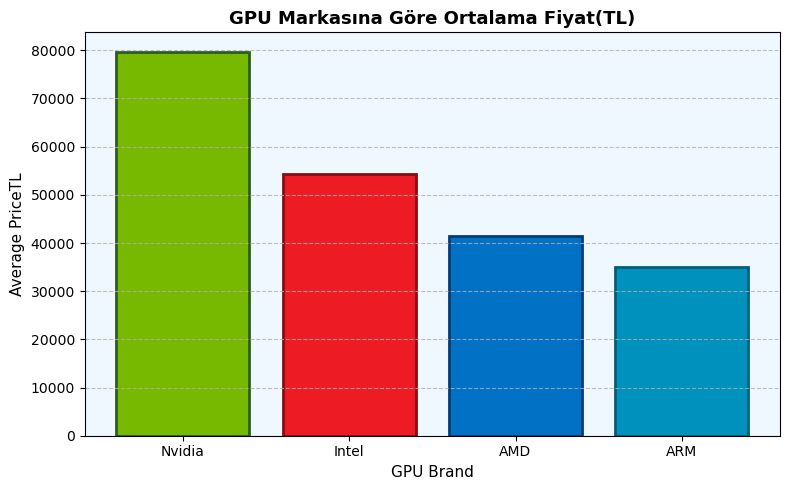

In [72]:
# GPU markasƒ±na g√∂re ortalama fiyat
gpu_avg_price = df.groupby('Gpu_Brand')['PriceTL'].mean().sort_values(ascending=False)
bar_colors = ["#76B900", "#ED1C24", "#0071C5", "#0091BD"]  # Dolgu renkleri
edge_colors = ["#2D5C1F", "#8A0C12", "#003C75", "#005D7A"]  # Kenarlƒ±k renkleri
plt.figure(figsize=(8,5))
plt.bar(gpu_avg_price.index, gpu_avg_price.values, color=bar_colors, edgecolor=edge_colors, linewidth=2)
plt.title('GPU Markasƒ±na G√∂re Ortalama Fiyat(TL)', fontsize=13, fontweight='bold')
plt.xlabel('GPU Brand', fontsize=11)
plt.ylabel('Average PriceTL', fontsize=11)
plt.gca().set_facecolor('#F0F8FF')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

<div class="alert alert-info alert-warning ">

# <span style=" color:red">Conclusions

<div class="alert alert-block alert-success">

Sonu√ß

Analiz sonucunda √∂ne √ßƒ±kan ba≈ülƒ±ca bulgular a≈üaƒüƒ±da √∂zetlenmi≈ütir:

Donanƒ±m √ñzellikleri:

RAM kapasitesi ve depolama t√ºr√º (√∂zellikle SSD ve hibrit √ß√∂z√ºmler) diz√ºst√º bilgisayar fiyatlarƒ±nƒ± belirlemede en etkili fakt√∂rler arasƒ±nda yer almaktadƒ±r.
√ñzellikle Y√ºksek RAM konfig√ºrasyonlarƒ± ile fiyat arasƒ±nda g√º√ßl√º ve pozitif bir korelasyon g√∂zlemlenmi≈ütir.
SSD ve hibrit bellek t√ºr√º de fiyatƒ± y√ºkeselten √∂nemli bir etkendir.

Ekran √ñzellikleri:

Y√ºksek √ß√∂z√ºn√ºrl√ºkl√º ekranlar ve dokunmatik ekran √∂zelliƒüine sahip diz√ºst√º bilgisayarlarƒ±n fiyat ortalamasƒ±nƒ±n √ºzerinde konumlandƒ±ƒüƒ± tespit edilmi≈ütir.
Bu bulgu, ekran teknolojisinin fiyatƒ± artƒ±ran √∂nemli bir unsur olduƒüunu g√∂stermektedir.

ƒ∞≈ülemci ve Grafik Kartƒ± Etkisi:

Performans odaklƒ± Intel i≈ülemciler fiyatƒ± yukarƒ± √ßekmektedir.
Oyun ve profesyonel kullanƒ±m odaklƒ± diz√ºst√º bilgisayarlarda, √∂zellikle Intel i7 serisi i≈ülemciler ve Nvidia GPU lar fiyatƒ± anlamlƒ± ≈üekilde artƒ±rmaktadƒ±r.

Bilgisayar T√ºr√º Etkisi:

Workstation, Gaming ve Ultrabook t√ºr√ºndeki cihazlarƒ±n y√ºksek fiyat segmentinde yer aldƒ±ƒüƒ± g√∂r√ºlm√º≈üt√ºr.

Aƒüƒ±rlƒ±k ve Ta≈üƒ±nabilirlik:

Ta≈üƒ±nabilirlik √∂zellikleri de fiyatƒ± etkileyen fakt√∂rler arasƒ±ndadƒ±r. √ñzellikle Ultrabook ve 2-in-1 Convertible modeller, hafif yapƒ±larƒ± ve y√ºksek ta≈üƒ±nabilirlik √∂zellikleri nedeniyle ortalamanƒ±n √ºzerinde fiyatlandƒ±rƒ±lmaktadƒ±r. Buna kar≈üƒ±lƒ±k, daha b√ºy√ºk ve aƒüƒ±r kasalara sahip olan Gaming ve Workstation cihazlar y√ºksek performansa sahip olduklarƒ± i√ßin yine y√ºksek fiyat aralƒ±ƒüƒ±nda yer almaktadƒ±r.

√úst D√ºzey Diz√ºst√º Bilgisayar Segmenti:

Fiyat daƒüƒ±lƒ±mƒ±nƒ±n en √ºst %20 lik diliminde, Dell, Lenovo ve HP markalarƒ±nƒ±n yoƒüunla≈ütƒ±ƒüƒ± g√∂r√ºlm√º≈üt√ºr.
Bu segmentteki cihazlarƒ±n √ßoƒüu y√ºksek RAM kapasitesine, SSD ve Hibrit depolama birimine, geli≈ümi≈ü i≈ülemcilere ve y√ºksek √ß√∂z√ºn√ºrl√ºkl√º ekranlara g√º√ßl√º grafik kartlarƒ±na sahiptir.
Ancak bu veri setindeki en y√ºksek fiyat segmentindeki cihazlarƒ±n b√ºy√ºk √ßoƒüunluƒüunda dokunmatik ekran √∂zelliƒüi bulunmamaktadƒ±r; bu da fiyat √ºzerinde etkili olan i≈ülemci, RAM, GPU ve bellek t√ºr√ºn√ºn aƒüƒ±rlƒ±ƒüƒ±nƒ± ortaya koymaktadƒ±r.


√áalƒ±≈üma sonucunda, diz√ºst√º bilgisayar fiyatlarƒ±nƒ± belirleyen en kritik fakt√∂rlerin;
Donanƒ±m √∂zellikleri; √∂zellikle y√ºksek RAM kapasiteleri, SSD depolama √ß√∂z√ºmleri, geli≈ümi≈ü i≈ülemciler(CPU) ve g√º√ßl√º grafik kartlarƒ±(GPU) olduƒüu g√∂r√ºlmektedir.

Not: Bu analiz yalnƒ±zca mevcut veri seti kapsamƒ±nda ger√ßekle≈ütirilmi≈ütir. Daha geni≈ü kapsamlƒ± ve g√ºncel verilerle yapƒ±lacak ek analizler, pazardaki eƒüilimlerin ve belirleyici fakt√∂rlerin daha net ortaya konmasƒ±nƒ± saƒülayacaktƒ±r.

---

## üë• Katƒ±lƒ±mcƒ±lar

- Ahmet Derya  
- Baris Gungor  
- Betul Gurlevik  
- Isilay Tamer  
- Kaan Altay  
- Mehmet Duzenli  
- Mehmet Enes Soyler  
- Meray Erzi  
- Mesut Karag√∂z  
- Muhammed Bakirtas  
- Nazgul Barpieva  
- Neslihan Bozkurt  
- Sule Demir  
- Yavuz Selim Kucukonder  
- Zaka Mikayilzade  

---

### üéì Proje Danƒ±≈ümanƒ±  
**Huriye Buyukpancar**


![](https://www.techproeducation.com/logo/headerlogo.svg)
<img src="DS1_logo.jpg" alt="DS1 Logo" width="150"/>

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanƒ±z l√ºtfen bizi takip etmeyi unutmayƒ±n </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |